#📌 Extracão

In [1]:
# Importar bibliotecas necessárias
import json
import pandas as pd

# Definir o caminho do arquivo (ajuste se o nome for diferente)
caminho_arquivo = '/content/TelecomX_Data.json'

# Ler o arquivo JSON diretamente do caminho
with open(caminho_arquivo, 'r') as arquivo:
    dados_json = json.load(arquivo)

# Visualizar os 3 primeiros registros para confirmar leitura
dados_json[:3]


[{'customerID': '0002-ORFBO',
  'Churn': 'No',
  'customer': {'gender': 'Female',
   'SeniorCitizen': 0,
   'Partner': 'Yes',
   'Dependents': 'Yes',
   'tenure': 9},
  'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'},
  'internet': {'InternetService': 'DSL',
   'OnlineSecurity': 'No',
   'OnlineBackup': 'Yes',
   'DeviceProtection': 'No',
   'TechSupport': 'Yes',
   'StreamingTV': 'Yes',
   'StreamingMovies': 'No'},
  'account': {'Contract': 'One year',
   'PaperlessBilling': 'Yes',
   'PaymentMethod': 'Mailed check',
   'Charges': {'Monthly': 65.6, 'Total': '593.3'}}},
 {'customerID': '0003-MKNFE',
  'Churn': 'No',
  'customer': {'gender': 'Male',
   'SeniorCitizen': 0,
   'Partner': 'No',
   'Dependents': 'No',
   'tenure': 9},
  'phone': {'PhoneService': 'Yes', 'MultipleLines': 'Yes'},
  'internet': {'InternetService': 'DSL',
   'OnlineSecurity': 'No',
   'OnlineBackup': 'No',
   'DeviceProtection': 'No',
   'TechSupport': 'No',
   'StreamingTV': 'No',
   'StreamingMovies': 

In [2]:
# Usar json_normalize para converter estrutura aninhada em DataFrame
df = pd.json_normalize(dados_json)

# Visualizar o DataFrame resultante
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [3]:
# Verificar as colunas disponíveis e amostrar os dados
print(df.columns.tolist())
df.head()


['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
# Simplificar os nomes removendo os prefixos dos níveis (caso existam)
df.columns = [col.split('.')[-1] if '.' in col else col for col in df.columns]

# Renomear colunas que ficaram genéricas ou repetidas
df.rename(columns={
    'Monthly': 'MonthlyCharges',
    'Total': 'TotalCharges'
}, inplace=True)


In [5]:
# Verificar tipos
print(df.dtypes)

# Converter valores numéricos de 'TotalCharges' para float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Verificar se há valores nulos
print(df.isnull().sum())


customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object
customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
Paperle

In [6]:
# Preencher valores nulos de 'TotalCharges' com a mediana (ou 0, se preferir)
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


<ipython-input-6-2705852077>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [7]:
# Mapear Churn para valores binários
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Mapear SeniorCitizen para string (caso queira usar em gráfico)
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'Não', 1: 'Sim'})


In [8]:
# Verificar se tudo está ok
print(df.info())
print(df.describe())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   float64
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   object 
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0002-ORFBO,0.0,Female,Não,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,0.0,Male,Não,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,1.0,Male,Não,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1.0,Male,Sim,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1.0,Female,Sim,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [9]:
# Salvar versão transformada como CSV
df.to_csv('/content/dados_telecom_transformados.csv', index=False)


#📊 Carga e análise

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo dos gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)


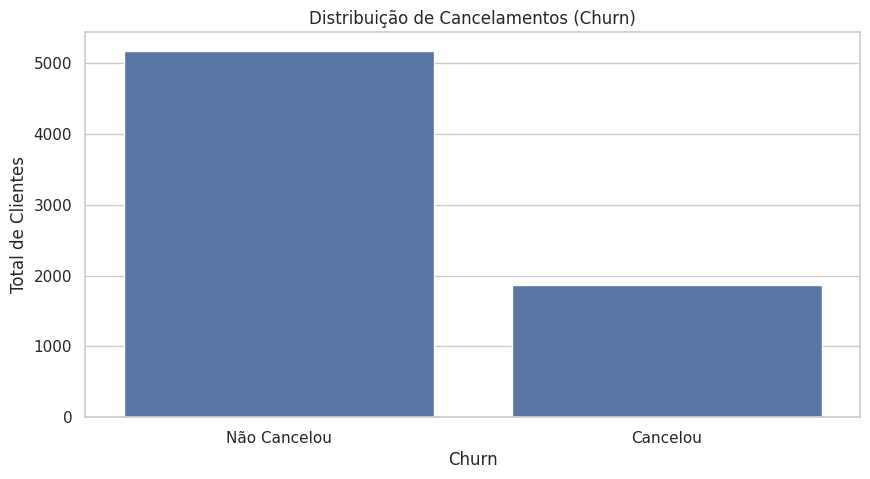

Taxa geral de churn: 26.54%


In [11]:
# Distribuição entre clientes que cancelaram e os que não cancelaram
sns.countplot(data=df, x='Churn')
plt.title('Distribuição de Cancelamentos (Churn)')
plt.xticks([0, 1], ['Não Cancelou', 'Cancelou'])
plt.xlabel('Churn')
plt.ylabel('Total de Clientes')
plt.show()

# Porcentagem de churn
churn_rate = df['Churn'].mean() * 100
print(f"Taxa geral de churn: {churn_rate:.2f}%")


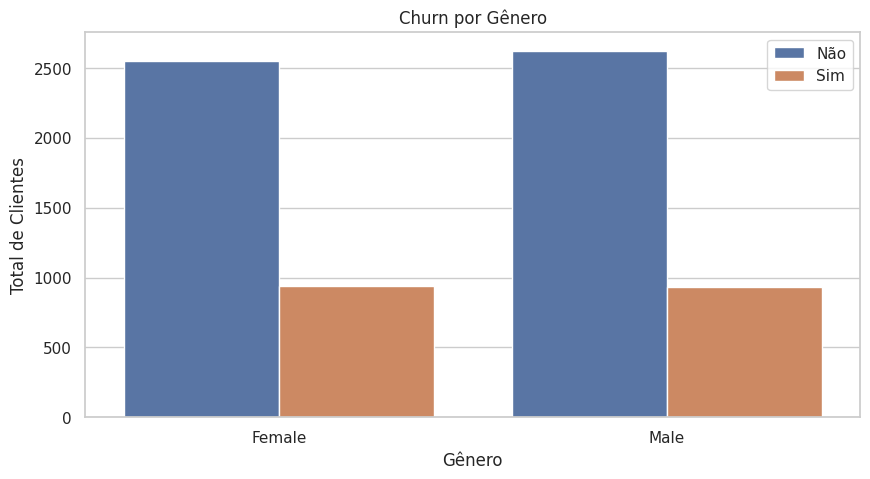

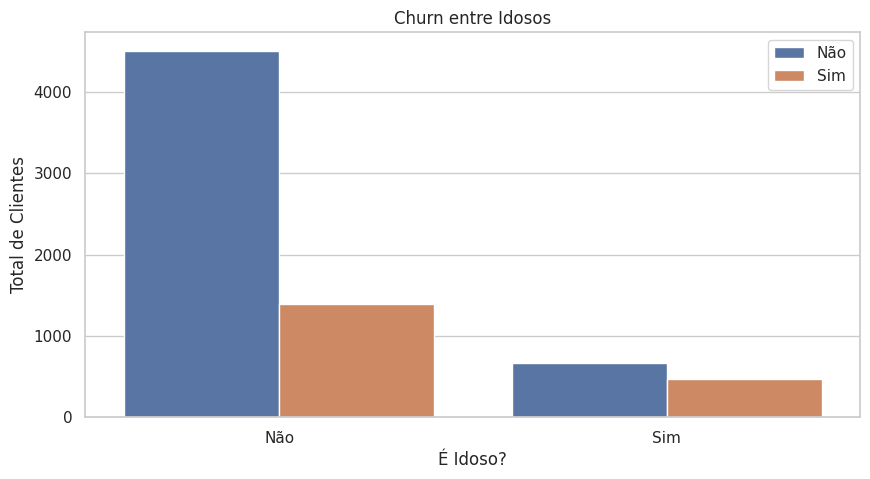

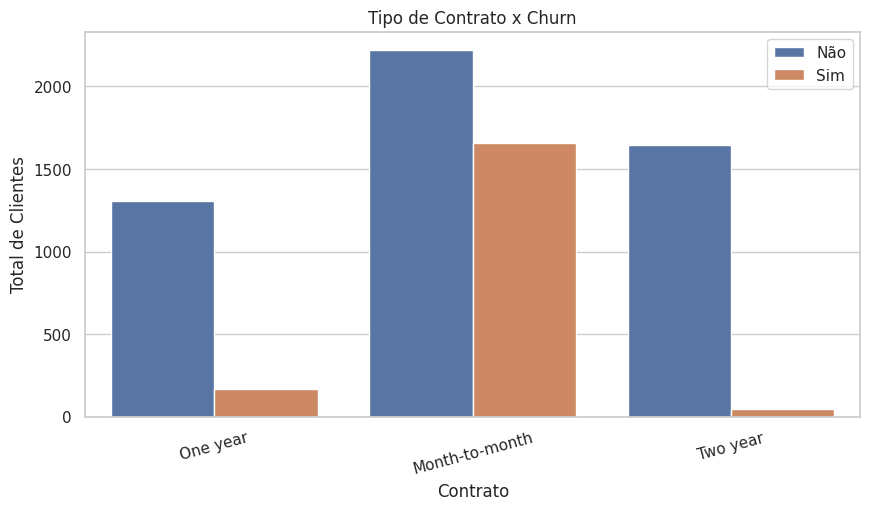

In [12]:
# Gênero vs Churn
sns.countplot(data=df, x='gender', hue='Churn')
plt.title('Churn por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Total de Clientes')
plt.legend(['Não', 'Sim'])
plt.show()

# Idosos vs Churn
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
plt.title('Churn entre Idosos')
plt.xlabel('É Idoso?')
plt.ylabel('Total de Clientes')
plt.legend(['Não', 'Sim'])
plt.show()

# Tipo de contrato vs Churn
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Tipo de Contrato x Churn')
plt.xticks(rotation=15)
plt.xlabel('Contrato')
plt.ylabel('Total de Clientes')
plt.legend(['Não', 'Sim'])
plt.show()


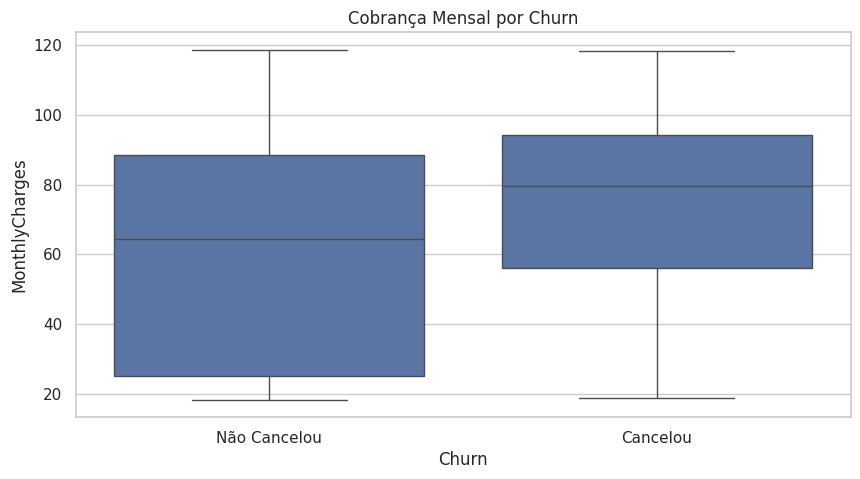

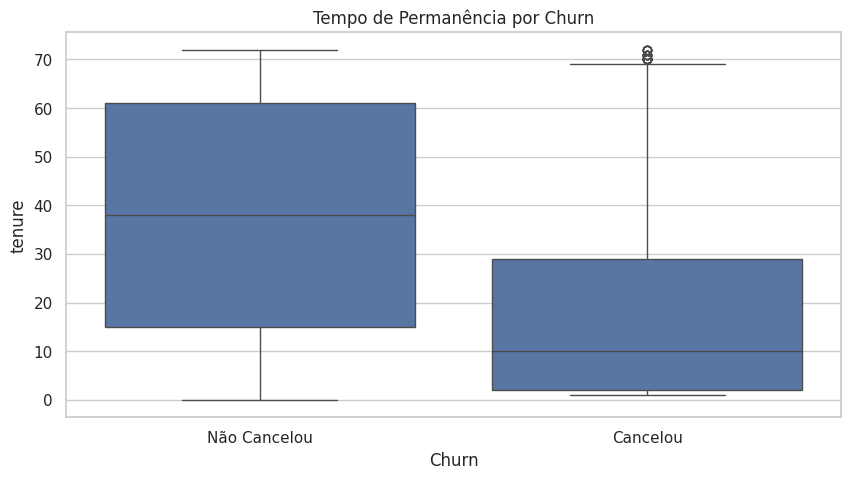

In [13]:
# Cobrança mensal por churn
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Cobrança Mensal por Churn')
plt.xticks([0, 1], ['Não Cancelou', 'Cancelou'])
plt.show()

# Tempo de permanência por churn
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tempo de Permanência por Churn')
plt.xticks([0, 1], ['Não Cancelou', 'Cancelou'])
plt.show()


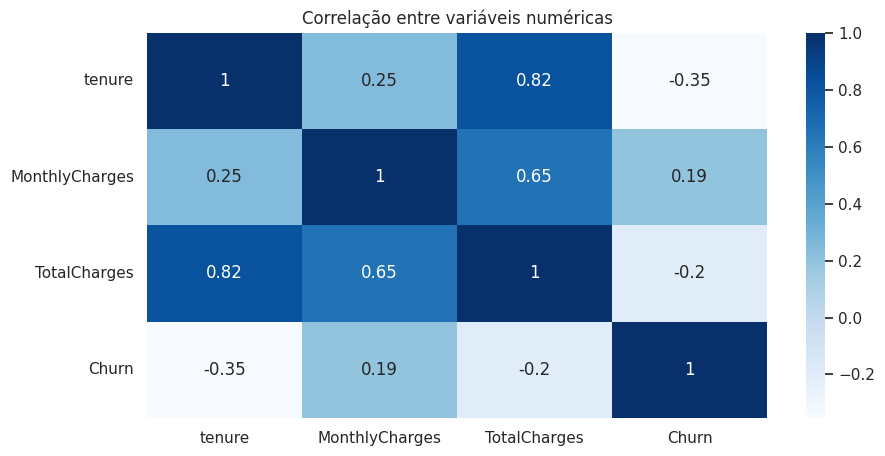

In [14]:
# Selecionar colunas numéricas de interesse
numericas = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Matriz de correlação
corr = df[numericas].corr()

# Plotar heatmap
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlação entre variáveis numéricas')
plt.show()


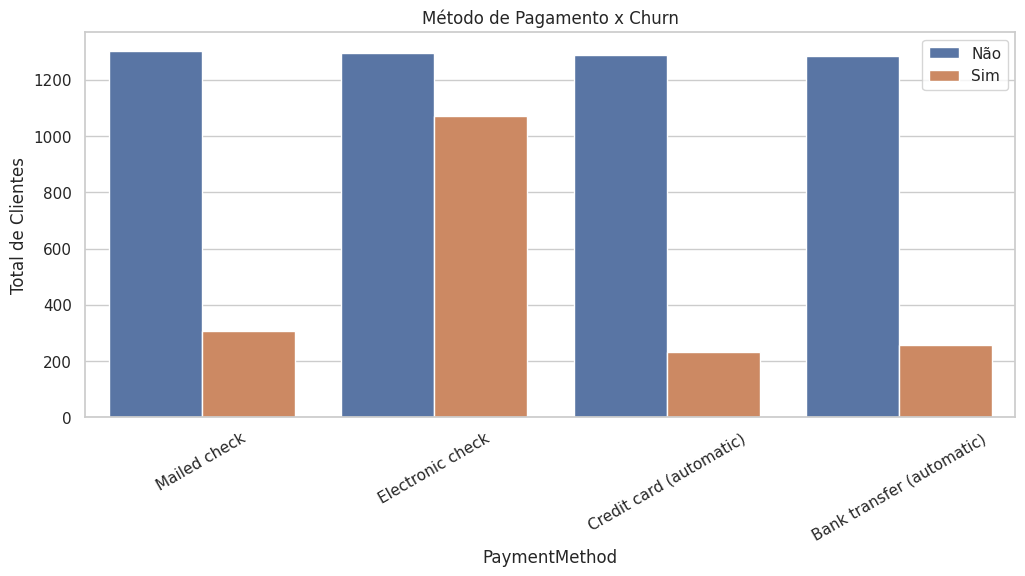

In [15]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Método de Pagamento x Churn')
plt.xticks(rotation=30)
plt.ylabel('Total de Clientes')
plt.legend(['Não', 'Sim'])
plt.show()


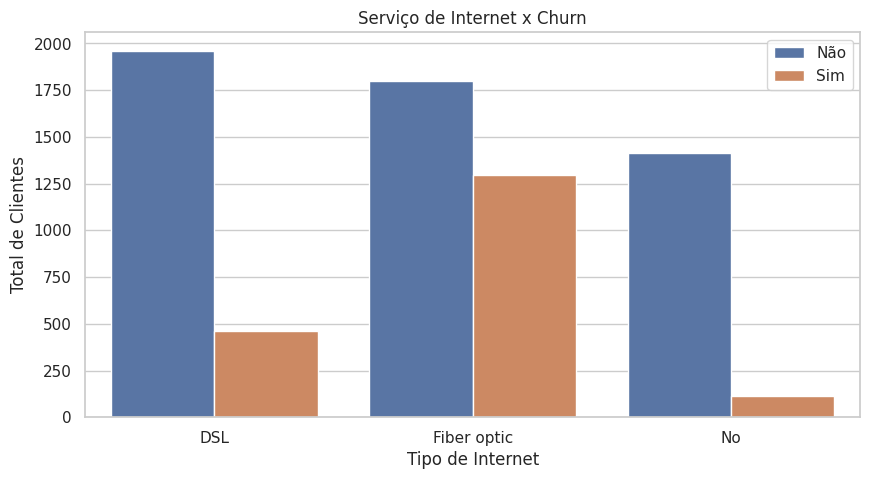

In [16]:
# InternetService vs Churn
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Serviço de Internet x Churn')
plt.xlabel('Tipo de Internet')
plt.ylabel('Total de Clientes')
plt.legend(['Não', 'Sim'])
plt.show()


### ✅ **Relatório Final — Análise de Evasão de Clientes (Churn) — Telecom X**

---

#### 📌 Objetivo

Analisar o comportamento dos clientes da **Telecom X** e identificar os principais fatores que contribuem para a evasão (churn), com base em uma base de dados fornecida em formato JSON. A análise visa fornecer insights estratégicos para as equipes de produto, atendimento e marketing, além de fundamentar futuras iniciativas de modelagem preditiva.

---

#### 🔎 1. Visão Geral do Churn

* **Taxa geral de evasão:** **26,54%** dos clientes cancelaram seus contratos.
* Essa taxa é considerada **alta** e indica uma vulnerabilidade importante na retenção de clientes.

---

#### 🧑‍🤝‍🧑 2. Perfil Demográfico

**🔹 Gênero**

* A evasão é levemente mais frequente entre **mulheres (26,9%)** do que entre homens (26,2%).
* Contudo, a diferença é pequena, sugerindo que **gênero não é um fator decisivo** na evasão.

**🔹 Idosos (Senior Citizens)**

* Clientes idosos têm uma taxa de churn de **41,7%**, muito superior à de não idosos (**23,6%**).
* Representam um grupo de alto risco e podem demandar maior atenção no atendimento e comunicação.

---

#### 📄 3. Características Contratuais

**🔹 Tipo de Contrato**

* **Contrato mês a mês:** **42,7%** de churn
* **Contrato de 1 ano:** **11,3%**
* **Contrato de 2 anos:** **2,8%**
* **Conclusão:** Clientes sem fidelização contratual têm maior probabilidade de evasão.

**🔹 Método de Pagamento**

* **Electronic check:** 45,3% de churn
* **Cartão de crédito (automático):** 15,2%
* **Transferência bancária (automática):** 16,7%
* Incentivar **pagamentos automáticos** pode ajudar na retenção.

---

#### 💰 4. Faturamento e Cobrança

**🔹 Cobrança Mensal**

* Clientes que cancelaram pagam, em média, **R\$ 74,44**, enquanto os demais pagam **R\$ 61,27**.
* Planos mais caros estão associados a maior churn.

**🔹 Tempo de Permanência**

* Cancelamentos ocorrem mais entre clientes com **média de 18 meses**, enquanto os demais permanecem por **37 meses**.
* Isso reforça a importância de **ações de retenção nos primeiros meses**.

---

#### 📡 5. Tipo de Internet

* **Sem internet:** 7,4% de churn
* **DSL:** 19,0%
* **Fibra óptica:** 41,9%
* Clientes de fibra são mais suscetíveis à evasão, sugerindo necessidade de **melhoria na percepção de valor e/ou suporte técnico**.

---

#### 🔗 6. Correlações Estatísticas

| Variável             | Correlação com Churn |
| -------------------- | -------------------- |
| Tempo de permanência | -0,35                |
| Cobrança mensal      | +0,19                |
| Total pago           | -0,20                |

* Clientes que permanecem mais tempo têm menor chance de evasão.
* Planos caros tendem a elevar o churn.

---

#### ✅ Conclusões e Recomendações

**Fatores críticos identificados:**

* Contratos mensais (sem fidelização)
* Clientes idosos
* Pagamento via "Electronic check"
* Planos com cobrança mais alta
* Clientes novos (baixo tempo de permanência)
* Usuários de internet fibra

**Recomendações estratégicas:**

1. **Campanhas para migração para contratos anuais ou bienais.**
2. **Benefícios e atendimento dedicado para idosos.**
3. **Incentivos ao pagamento automático.**
4. **Acompanhamento proativo nos primeiros 6 meses.**
5. **Investigar e aprimorar o serviço de fibra óptica.**